In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.distributions import gamma

sns.set()
%matplotlib inline

In [147]:
# read in the CSV's
calls = pd.read_csv(r'../data/callsForServiceUpdated.csv')

C:\Users\81wingo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Clean up


In [148]:
calls = calls[calls.rptonly != True]
calls = calls[calls.cancelled != True]
print(len(calls))

1085198


In [149]:
calls['calltime'] = pd.to_datetime(calls.calltime)
calls['year'] = calls.calltime.apply(lambda x: x.date().year)
calls['month'] = calls.calltime.apply(lambda x: x.date().month)
calls['dayOfMonth'] = calls.calltime.apply(lambda x: x.date().day)
calls['hour'] = calls.calltime.apply(lambda x: x.time().hour)
calls = calls.rename(columns={'calldow' : 'dayOfWeek'})
calls = calls.drop(columns = ['timeclose', 'calltime'], axis = 1)
calls

,inci_id,parent_id,case_id,callsource,street,city,streetonly,geox,geoy,nature,...,secsar2lc,secsrt2dsp,secstr2lc,firstdisp,long,lat,year,month,dayOfMonth,hour
0,2012324665,NaN,NaN,SELF,OLD RANDLEMAN RD/COLTRANE MILL RD,G,OLD RANDLEMAN RD/COLTRANE MILL RD,1755293.88,800660.13,TRAFFIC STOP,...,651,0,0,S335,-79.826738,35.947098,2012,7,1,0
1,2012324676,NaN,1234238.0,E911,312 MARTIN LUTHER KING JR DR,G,MARTIN LUTHER KING JR DR,1767127.13,843918.75,HEMORRHAGE / LACERATIONS,...,2454,43,965,M261,-79.787921,36.066193,2012,7,1,0
2,2012324686,NaN,NaN,SELF,4525 W WENDOVER AV,G,W WENDOVER AV,1731815.63,838827.63,TRANSPORT TO ANIMAL SHELTER,...,0,0,0,ACO8,-79.907233,36.051380,2012,7,1,0
3,2012324690,NaN,1234239.0,E911,3905 BROOKHOLLOW RD,W,BROOKHOLLOW RD,1808054.75,822506.31,SEIZURES-CONVULSIONS,...,4522,30,3918,M2,-79.648974,36.008188,2012,7,1,0
4,2012324692,2.012325e+09,1206134.0,E911,3905 BROOKHOLLOW RD,W,BROOKHOLLOW RD,1808054.75,822506.31,SEIZURES-CONVULSIONS,...,900,8,0,E44,-79.648974,36.008188,2012,7,1,0
5,2012324697,NaN,1234240.0,E911,5125 MICHAUX RD,G,MICHAUX RD,1744080.88,874458.88,FALLS-BACK INJURIES(TRAUMATIC),...,0,10,0,M241,-79.866796,36.149555,2012,7,1,0
6,2012324704,NaN,1234241.0,E911,1409 DANS RD,G,DANS RD,1778039.38,840417.56,SICK PERSON,...,2295,29,1267,M211,-79.750911,36.056808,2012,7,1,0
7,2012324709,NaN,NaN,SELF,8069 HAW RIVER RD,ST,HAW RIVER RD,1709461.00,897647.69,TRAFFIC STOP,...,112,0,0,S314,-79.984825,36.212362,2012,7,1,0
8,2012324711,NaN,1234242.0,W911,WESTCHESTER DR/N MAIN ST,H,WESTCHESTER DR/N MAIN ST,1697332.38,814158.75,CHEST PAIN,...,2090,17,1323,M221,-80.023017,35.982696,2012,7,1,0
9,2012324715,NaN,NaN,PHONE,8403 MEARS FORK RD,SU,MEARS FORK RD,1759324.13,906703.25,DOMESTIC DISPUTE,...,1109,102,0,S314,-79.816067,36.238478,2012,7,1,0


In [150]:
calls['actualnature'] = [x['nature2'] if x['nature'] is np.nan and x['nature'] != x['nature2'] else x['nature'] for i,x in calls.iterrows()]

In [151]:
calls.columns


Index(['inci_id', 'parent_id', 'case_id', 'callsource', 'street', 'city',
       'streetonly', 'geox', 'geoy', 'nature', 'nature2', 'priority',
       'medprior', 'meddislvl', 'rptonly', 'service', 'agency', 'district',
       'statbeat', 'ra', 'gp', 'primeunit', 'cancelled', 'closecode',
       'dayOfWeek', 'secs2rt', 'secs2di', 'secs2en', 'secs2ar', 'secs2tr',
       'secs2lc', 'secsdi2en', 'secsdi2ar', 'secsar2tr', 'secsar2lc',
       'secsrt2dsp', 'secstr2lc', 'firstdisp', 'long', 'lat', 'year', 'month',
       'dayOfMonth', 'hour', 'actualnature'],
      dtype='object')

In [152]:
calls.shape

(1085198, 45)

In [153]:
newdf = calls.drop(columns=['inci_id', 'parent_id', 'case_id', 'callsource', 'street', 'city',
       'streetonly', 'geox', 'geoy', 'nature', 'nature2', 'medprior', 'meddislvl', 'rptonly', 'service', 
       'statbeat', 'ra', 'gp', 'primeunit', 'cancelled', 'closecode',
       'dayOfWeek', 'secs2rt', 'secs2di', 'secs2en', 'secs2tr',
       'secs2lc', 'secsdi2en', 'secsdi2ar', 'secsar2tr', 'secsar2lc',
       'secsrt2dsp', 'secstr2lc', 'firstdisp', 'long', 'lat', 'year', 'month',
       'dayOfMonth', 'hour'])

In [206]:
calls.agency.unique()

array(['GCSD', 'EMS', 'ACO', 'GCF'], dtype=object)

In [205]:
#use sklearn label encoder to convert strings to numbers that can be used for calculations
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in newdf.columns:
    newdf[col] = labelencoder.fit_transform(newdf[col].astype(str))
 
newdf.head(11)

,priority,agency,district,secs2ar,actualnature
0,0,3,54,0,106
1,4,1,5,14154,33
2,9,0,60,0,114
3,0,1,3,4501,85
4,10,2,0,1449,85
5,3,1,63,0,7
6,4,1,34,10363,86
7,0,3,51,1,106
8,0,1,45,10877,228
9,0,3,51,536,246


In [155]:
newdf.columns


Index(['priority', 'agency', 'district', 'secs2ar', 'actualnature'], dtype='object')

In [156]:
newdf.describe()

,priority,agency,district,secs2ar,actualnature
count,1.085198e+06,1.085198e+06,1.085198e+06,1.085198e+06,1.085198e+06
mean,2.710528e+00,1.797215e+00,3.197854e+01,5.612929e+03,1.251271e+02
std,2.955916e+00,1.072657e+00,2.335354e+01,4.546549e+03,7.061317e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,6.100000e+01
50%,1.000000e+00,1.000000e+00,3.400000e+01,6.061000e+03,1.260000e+02
75%,4.000000e+00,3.000000e+00,5.700000e+01,8.979000e+03,1.940000e+02
max,1.000000e+01,3.000000e+00,6.300000e+01,1.482200e+04,2.590000e+02


## Extra Data Analytics
Try to plot somethings that i didnt do the last Data analytics assignment like some distribution curves and apie chart to show the distribution of the priorities

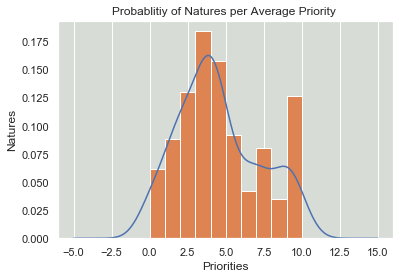

In [209]:
fig, ax = plt.subplots()
x = newdf.groupby(['actualnature'])['priority'].agg(lambda x: x.unique().mean())
x.plot.kde(ax=ax, legend=False, title = 'Probablitiy of Natures per Average Priority ')
x.plot.hist(density = True, ax = ax)
ax.set_ylabel('Natures')
ax.set_xlabel('Priorities')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')


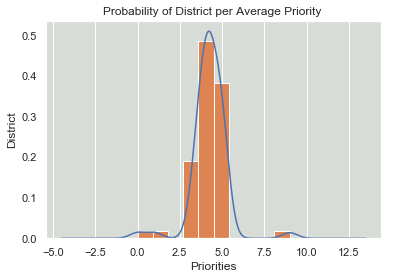

In [158]:
fig, ax = plt.subplots()
x = newdf.groupby(['district'])['priority'].agg(lambda x: x.unique().mean())
x.plot.kde(ax=ax, legend=False, title = 'Probability of District per Average Priority ')
x.plot.hist(density = True, ax = ax)
ax.set_ylabel('District')
ax.set_xlabel('Priorities')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [159]:
newdf['priority'].value_counts()

0     302044
1     253865
3     130006
2     103999
6     100373
8      78146
9      78126
4      37366
7        995
10       244
5         34
Name: priority, dtype: int64

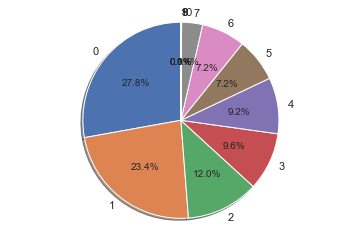

In [160]:
labels = '0','1', '2', '3','4', '5', '6','7', '8', '9','10'
sizes = newdf['priority'].value_counts()
 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [161]:
newdf.agency.nunique()

4

In [162]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import scipy

## Hypothesis Testing
Check if the over all priority differs from each departments priority

In [ ]:
# The hypothesis Testing is in this order 'GCSD', 'EMS', 'ACO', 'GCF'

In [163]:
priority = newdf.priority
prioritymean = newdf.priority.mean()
a = newdf[(newdf['agency']==0)]
apriority = a.priority
aprioritymean = apriority.mean()
print(prioritymean)
print(aprioritymean)

2.7105284012687085
7.245003646973013


In [196]:
scipy.stats.ttest_1samp(apriority, prioritymean)

Ttest_1sampResult(statistic=-163.55170654018178, pvalue=0.0)

In [165]:
sigma = apriority.std()/math.sqrt(100) 
stats.t.interval(0.95,                        
                 df = 99,                     
                 loc = aprioritymean, 
                 scale= sigma)   

(6.824214524952422, 7.665792768993603)

In [166]:
stats.t.interval(alpha = 0.99,                
                 df = 99,                     
                 loc = aprioritymean,
                 scale= sigma)


(6.6880268278695825, 7.801980466076443)

In [197]:
stats.ttest_1samp(a= apriority, popmean= prioritymean)

Ttest_1sampResult(statistic=-163.55170654018178, pvalue=0.0)

In [198]:
a = newdf[(newdf['agency']==1)]
apriority = a.priority
aprioritymean = apriority.mean()
print(prioritymean)
print(aprioritymean)

2.7105284012687085
1.7322056388988445


In [169]:
scipy.stats.ttest_1samp(apriority, prioritymean)


Ttest_1sampResult(statistic=-409.04582480241584, pvalue=0.0)

In [170]:
sigma = apriority.std()/math.sqrt(100) 
stats.t.interval(0.95,                        
                 df = 99,                     
                 loc = prioritymean, 
                 scale= sigma)   

(2.385615309652272, 3.035441492885145)

In [171]:
stats.t.interval(alpha = 0.99,                
                 df = 99,                     
                 loc = prioritymean,
                 scale= sigma)


(2.280457729801282, 3.1405990727361353)

In [172]:
   stats.ttest_1samp(a= apriority, popmean= prioritymean)

Ttest_1sampResult(statistic=-409.04582480241584, pvalue=0.0)

In [199]:
a = newdf[(newdf['agency']==2)]
apriority = a.priority
aprioritymean = apriority.mean()
print(prioritymean)
print(aprioritymean)

2.7105284012687085
6.553930530164534


In [174]:
scipy.stats.ttest_1samp(apriority, prioritymean)

Ttest_1sampResult(statistic=306.33525657056634, pvalue=0.0)

In [175]:
sigma = apriority.std()/math.sqrt(100) 
stats.t.interval(0.95,                        
                 df = 99,                     
                 loc = prioritymean, 
                 scale= sigma)  

(2.007005742258964, 3.414051060278453)

In [176]:
stats.t.interval(alpha = 0.99,                
                 df = 99,                     
                 loc = prioritymean,
                 scale= sigma)


(1.7793118077863794, 3.6417449947510376)

In [177]:
stats.ttest_1samp(a= apriority, popmean= prioritymean)

Ttest_1sampResult(statistic=306.33525657056634, pvalue=0.0)

In [200]:
a = newdf[(newdf['agency']==3)]
apriority = a.priority
aprioritymean = apriority.mean()
print(prioritymean)
print(aprioritymean)

2.7105284012687085
2.067046130243156


In [179]:
scipy.stats.ttest_1samp(apriority, prioritymean)

Ttest_1sampResult(statistic=-163.55170654018178, pvalue=0.0)

In [180]:
sigma = apriority.std()/math.sqrt(100) 
stats.t.interval(0.95,                        
                 df = 99,                     
                 loc = prioritymean, 
                 scale= sigma)  

(2.192320834540955, 3.228735967996462)

In [181]:
stats.t.interval(alpha = 0.99,                
                 df = 99,                     
                 loc = prioritymean,
                 scale= sigma)


(2.0246038204112473, 3.3964529821261698)

In [211]:
stats.t.ppf(q=0.025,  
            df=99)

-1.9842169515086832

Between all of the groups ('GCSD', 'EMS', 'ACO', 'GCF') all of them have a p-value less then 0.05 which tells us to reject the null hypothesis that the agencies are not significantly different then from the pop mean.

In [182]:
newdf.actualnature.nunique()

260

In [ ]:
# need to start thinking of the next part which is machine learning models
#idea to maybe take the median or mode of each nature's priority and 
#set all of the priorities equal to the mode of each 


In [183]:

newdf.groupby(['actualnature','priority']).agg(lambda x: stats.mode(x)[0][0])

agency  district  secs2ar
actualnature priority                           
0            0              3        57        0
             1              3        57        0
             3              1         4     6996
             9              2        61     3920
1            0              1         5        0
             1              1         4        0
             2              1         5     8305
             3              1        13        0
             8              1         9     6549
             9              2        50        0
             10             1        13        0
2            1              3        55        0
             10             3        58        0
3            0              1         4        0
             1              2        21        0
             2              1         4        0
             3              1        13      379
             4              1         6     6878
             9              2        50        0
4            1              3        58        0
             2              1        13     6996
             3              1         4        0
             9              1         4        0
5            0              1        13        0
6            0              1         4        0
             9              2        50     5689
7            0              1        13        0
             2              1         6     1794
             8              3        58     9269
             9              2        50     5494
...                       ...       ...      ...
247          8              0        63        0
248          8              0        63        1
             10             0        63     9561
249          8              0        63        0
250          2              0        63     4012
             8              0        63     6731
             9              0        63        0
251          1              0        63     2967
             2              0        63     2585
             8              0        63        0
             9              0        63        0
252          0              0        63        0
             8              0        63        1
             9              0        63        0
253          2              0        63     5370
             8              0        63        1
254          2              0        63      415
             9              0        63     3640
255          2              0        63        0
             9              0        63     7394
256          8              0        63        0
             9              0        63     2605
257          0              0        63      875
             2              0        63      704
             3              0        63     3199
             9              0        63        0
258          8              0        63        0
259          2              0        63     6296
             8              0        63        1
             9              0        63     4477

[844 rows x 3 columns]

In [184]:
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

## Check the R Squared value to see if any of the variables can be used to conclude anything useful

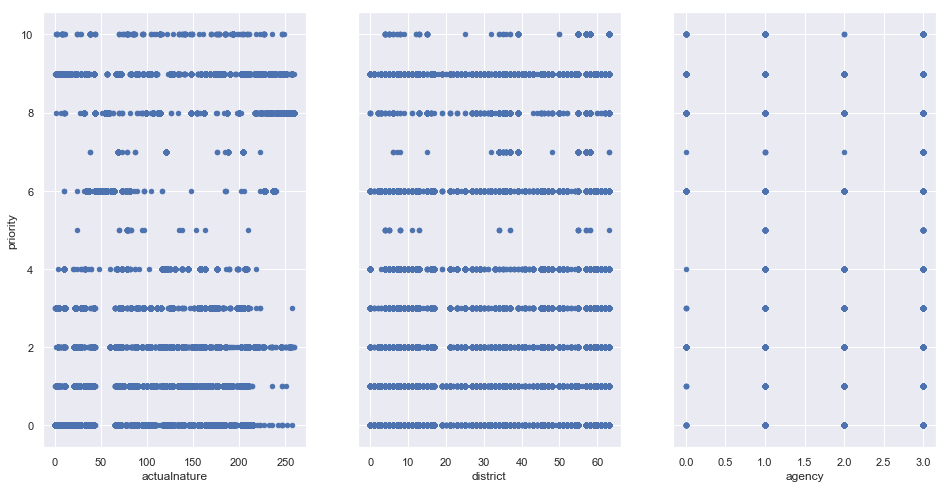

In [185]:
fig, axs = plt.subplots(1, 3, sharey=True)
newdf.plot(kind='scatter', x='actualnature', y='priority', ax=axs[0], figsize=(16, 8))
newdf.plot(kind='scatter', x='district', y='priority', ax=axs[1])
newdf.plot(kind='scatter', x='agency', y='priority', ax=axs[2])

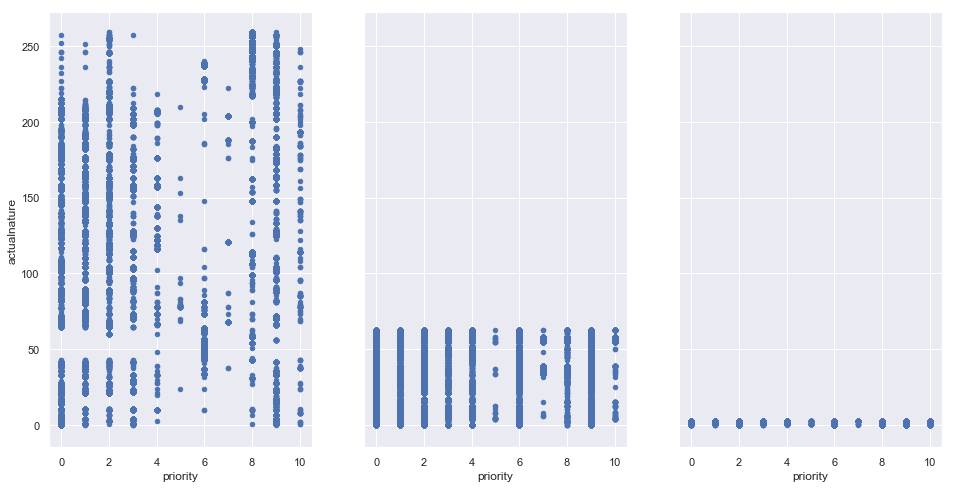

In [186]:
fig, axs = plt.subplots(1, 3, sharey=True)
newdf.plot(kind='scatter', x='priority', y='actualnature', ax=axs[0], figsize=(16, 8))
newdf.plot(kind='scatter', x='priority', y='district', ax=axs[1])
newdf.plot(kind='scatter', x='priority', y='agency', ax=axs[2])



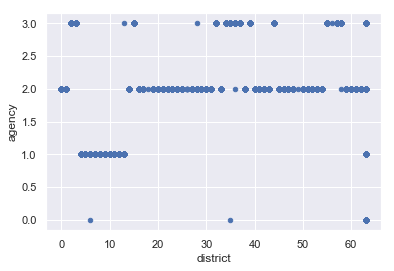

In [187]:

newdf.plot(kind='scatter', x= 'district', y ='agency')
newdf.plot(kind='scatter', x='priority', y='secs2ar', ax=axs[2])

In [188]:
import statsmodels.formula.api as smf
fitdf= smf.ols(formula = 'priority ~ district + agency + actualnature + secs2ar', data= newdf).fit()
fitdf.params

Intercept       4.704896
district        0.069922
agency         -1.513824
actualnature   -0.009476
secs2ar        -0.000058
dtype: float64

In [189]:
fitdf.rsquared

0.25969279444098714

In [190]:
fitdf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               priority   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                 9.517e+04
Date:                Fri, 02 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:29:18   Log-Likelihood:            -2.5528e+06
No. Observations:             1085198   AIC:                         5.106e+06
Df Residuals:                 1085193   BIC:                         5.106e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.7049      0.009    504.002      0.000       4.687       4.723
district         0.0699      0.000    541.081      0.000       0.070       0.070
agency          -1.5138      0.003   -518.237      0.000      -1.520      -1.508
actualnature    -0.0095   3.82e-05   -248.279      0.000      -0.010      -0.009
secs2ar      -5.773e-05   5.98e-07    -96.555      0.000   -5.89e-05   -5.66e-05
==============================================================================
Omnibus:                   111282.103   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148756.124
Skew:                           0.872   Prob(JB):                         0.00
Kurtosis:                       3.498   Cond. No.                     2.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
newdf.corr()

,priority,agency,district,secs2ar,actualnature
priority,1.000000,-0.202073,0.266702,-0.037386,0.008695
agency,-0.202073,1.000000,0.485025,-0.391345,-0.196934
district,0.266702,0.485025,1.000000,-0.332206,0.215493
secs2ar,-0.037386,-0.391345,-0.332206,1.000000,-0.088141
actualnature,0.008695,-0.196934,0.215493,-0.088141,1.000000


## The set is too big to use it on my personal computer I let this run for about 3 hours and it didnt finsh so i am going to do a random sampling of the data and see if i can get it execute faster
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = newdf.iloc[:,1:4]
y = newdf.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

clf = svm.SVC()
clf.fit(X_train, y_train)

X_test=scaler.fit_transform(X_test)
y_predict=clf.predict(X_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)

In [192]:
newdf.sample(n=1000, replace = False)

,priority,agency,district,secs2ar,actualnature
513505,0,3,37,0,194
443299,0,1,11,12834,70
166963,2,3,57,0,60
1205458,6,3,35,6147,53
481103,3,1,5,8500,199
854195,6,3,35,4215,56
480698,6,3,34,1,46
402884,1,3,58,14206,152
1201129,3,1,13,0,97
57954,2,1,5,10858,128


In [193]:
newdf.head()

,priority,agency,district,secs2ar,actualnature
0,0,3,58,0,194
1,3,1,13,9397,128
2,8,0,63,0,200
3,0,1,11,14048,175
4,9,2,0,11300,175


In [194]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = newdf.iloc[:,1:4]
y = newdf.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
regression_model.score(X_test, y_test)

In [ ]:
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = newdf.iloc[:,1:4]
y = newdf.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)

clf = svm.SVC()
clf.fit(X_train, y_train)

X_test=scaler.fit_transform(X_test)
y_predict=clf.predict(X_test)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
print(score)